In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sc_stats
import matplotlib.pyplot as plt


In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 12,
  'grid.alpha': 0.25})


## A uniform distribution of rolling a dice $N$ times

In [5]:
rng = np.random.default_rng()

# Roll a dice N times
N = 100
roll_dice = rng.integers(1, 7, N)
roll_dice[:100]   # print only the first 100

array([3, 5, 5, 6, 4, 3, 4, 5, 6, 6, 2, 4, 2, 4, 6, 6, 5, 4, 1, 4, 2, 1,
       1, 4, 3, 2, 2, 2, 3, 3, 5, 1, 4, 4, 6, 6, 1, 3, 4, 5, 6, 5, 5, 5,
       5, 2, 3, 2, 4, 4, 5, 6, 6, 2, 1, 5, 4, 1, 3, 5, 1, 3, 2, 4, 4, 3,
       4, 5, 4, 5, 6, 5, 6, 4, 2, 3, 4, 2, 5, 4, 2, 1, 3, 4, 4, 3, 1, 3,
       3, 2, 5, 3, 1, 1, 4, 4, 2, 4, 5, 2])

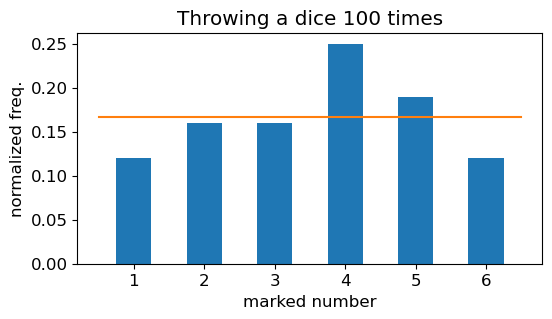

In [6]:
fig, ax = plt.subplots(figsize=(6, 3))

bins = np.arange(7) + 0.5
ax.hist(roll_dice, bins=bins, rwidth=0.5, density=True)
ax.plot([0.5, 6.5], [1/6, 1/6])

ax.set_xlabel("marked number")
ax.set_ylabel("normalized freq.")
ax.set_title(f"Throwing a dice {N:,} times")

plt.show(fig)

## A normal distribution of flipping a coin $N$ times

In [41]:
rng = np.random.default_rng()

# H = Head, T = Tail
N = 100

# number of experiment (how many times we flipping a coin N times)
#m = 100000    # (28 secs) 
#m = 10000     # (20 secs)
#m = 1000
m = 100
rand_vars = np.empty(m, dtype=int)
# Do N flipping coins m times

for i in range(m):
  flip_coin = rng.choice(['H', 'T'], N)

  # Count the number of head occurs in N times flipping
  # divided by N to normalize it
  rand_vars[i] = sum(flip_coin == 'H')

rand_vars[:100]   #  print the first 100 means of sum of Head position


array([48, 44, 51, 46, 45, 49, 48, 53, 48, 43, 55, 57, 51, 49, 48, 42, 53,
       55, 50, 43, 49, 48, 54, 65, 47, 53, 48, 49, 42, 48, 50, 55, 52, 62,
       56, 53, 48, 52, 54, 47, 53, 48, 53, 47, 46, 45, 48, 57, 53, 59, 49,
       47, 49, 48, 48, 49, 53, 49, 54, 49, 48, 53, 59, 50, 47, 49, 48, 49,
       48, 48, 48, 52, 42, 35, 60, 41, 47, 61, 42, 54, 47, 50, 44, 52, 54,
       46, 49, 41, 45, 48, 48, 45, 49, 54, 55, 59, 52, 52, 48, 41])

sigma = 4.96


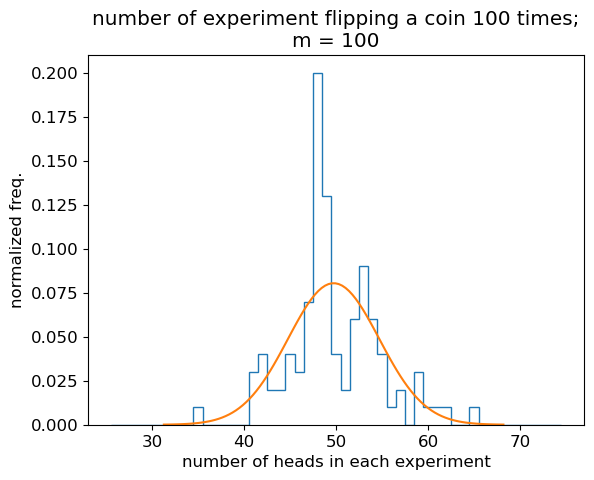

In [45]:
fig, ax = plt.subplots()

bins = np.arange(N/4, 3*N/4) + 0.5
ax.hist(rand_vars, histtype="step", bins=bins, density=True)

# normal distribution probability density function
mu = rand_vars.mean()
sigma = rand_vars.std()
print(f"sigma = {sigma:.2f}")
x = np.linspace(sc_stats.norm.ppf(0.0001),
                sc_stats.norm.ppf(0.9999), 100)
x = x*sigma + mu
ax.plot(x, sc_stats.norm.pdf(x, mu, sigma))

ax.set_xlabel("number of heads in each experiment")
ax.set_ylabel("normalized freq.")
ax.set_title(f"number of experiment flipping a coin {N} times;\nm = {m}")


plt.show(fig)

## $t$-distribution from flipping a coin $N$ times

(I skipped this section for a moment)

## $t$-distribution (sampling from normal distribution) 

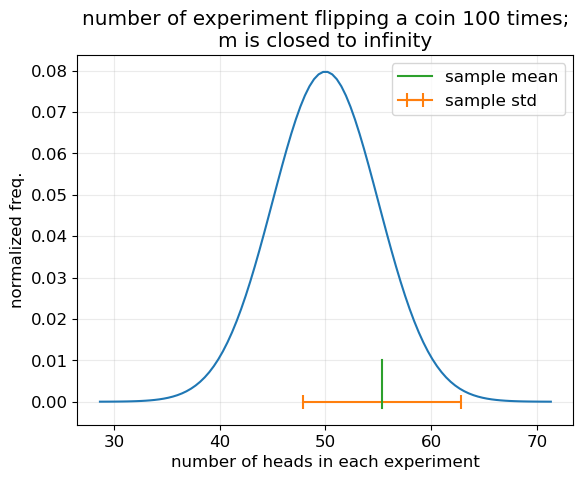

In [180]:
population_mean = 50
population_std = 5

fig, ax = plt.subplots()

x = np.linspace(sc_stats.norm.ppf(0.00001),
                sc_stats.norm.ppf(0.99999), 100)
x = x*population_std + population_mean
ax.plot(x, sc_stats.norm.pdf(x, population_mean, population_std),
  label=None)

# sampling n random numbers
n_sampling = 2
norm_rand_vars = sc_stats.norm.rvs(
  population_mean, population_std, n_sampling)

sample_mean = norm_rand_vars.mean()
sample_std = np.sqrt(sum((norm_rand_vars - sample_mean)**2) / (n_sampling-1))

# plot sample_mean and sample_std
ax.errorbar(
  sample_mean, 0, xerr=sample_std, capsize=5, capthick=1.5, 
  label="sample std")
ax.plot([sample_mean, sample_mean], [-0.0015, 0.01],
  label="sample mean")

ax.set_xlabel("number of heads in each experiment")
ax.set_ylabel("normalized freq.")
ax.set_title(f"number of experiment flipping a coin {N} times;\nm is closed to infinity")
ax.grid("on")
ax.legend(loc="best")

plt.show(fig)

Let $x_1, \ldots, x_n$ be the numbers observed in a sample from a continously distributed population with expected value $\mu$. The sample mean and sample variance are given by:

$$
\begin{gather*}
  \overline{x} = \frac{x_1 + \ldots + x_n}{n} \\\
  s^2 = \frac{1}{n-1} \sum^n_{i=1} (x_i - \overline{x})^2
\end{gather*}
$$

The resulting *t-value* is

$$
t = \frac{\overline{x} - \mu}{s /\sqrt{n}}
$$

In [199]:
rng = np.random.default_rng()

population_mean = 50
population_std = 5
n_sampling = 2   # you can change this up to 30  

# number of experiment (how many times we do n_sampling)
t_m = 10000
t_rand_vars = np.empty(t_m)

# Do N flipping coins m times
for i in range(t_m):
  norm_rand_vars = sc_stats.norm.rvs(
    population_mean, population_std, n_sampling)
  sample_mean = norm_rand_vars.mean()
  sample_std = np.sqrt(sum((norm_rand_vars - sample_mean)**2) / (n_sampling - 1))

  t_rand_vars[i] = (sample_mean - population_mean) \
    /(sample_std / np.sqrt(n_sampling))

t_rand_vars[:20],   #  print the first 20 random variable sampled from t-distribution
min(t_rand_vars), max(t_rand_vars)

(-1096.0414816079133, 63499.634747522294)

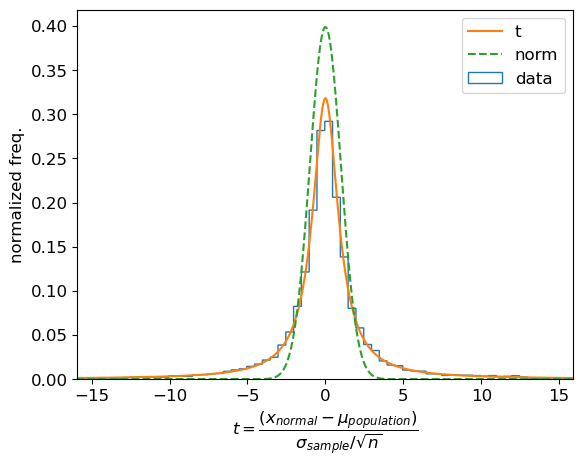

In [201]:
fig, ax = plt.subplots()

binwidth = 0.5
min_t_rand_vars = min(t_rand_vars) 
max_t_rand_vars = max(t_rand_vars) 
bins = np.arange(min_t_rand_vars, max_t_rand_vars + binwidth, binwidth)
ax.hist(t_rand_vars, bins=bins, histtype="step", density=True, label="data")

# pdf of t-distribution
x = np.linspace(sc_stats.t.ppf(0.01, n_sampling-1),
                sc_stats.t.ppf(0.99, n_sampling-1), 1000)
ax.plot(x, sc_stats.t.pdf(x, n_sampling-1), label='t')

# pdf of normal distribution
ax.plot(x, sc_stats.norm.pdf(x), linestyle='--', label='norm')

ax.set_xlabel(r"$t = \dfrac{(x_{normal} - \mu_{population})}{\sigma_{sample}/\sqrt{n}}$")
ax.set_ylabel("normalized freq.")
ax.set_xlim([0.5*min(x), 0.5*max(x)])
ax.legend(loc='best')

plt.show(fig)
